I.	**Business Problem**

In the modern world, commercial transactions and business that were once conducted through paper and physical means are quickly being replaced through digital and electronic means. Instead of a printed financial note that is exchanged between two or more parties, the exchange occurs as electronic and paperless transactions, at sub second speeds, and sometimes involving bad actors who intend to intercede in these transactions to commit fraud.
The goal of this exercise is to identify, through different AI/ML classification models, whether a transaction is fraudulent or not.  The goal would be to set up a set of independent variables that would form the ‘X’ component in the model, and a ‘Y’ dependent variable that would determine whether a transaction is fraudulent conducted through bad intent.


II **Situation Assessment**

Resources employed for this exercise will include a Kaggle Credit Card  dataset with 284000 + instances, The goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines), and thereby assess which type of classification model best identifies whether a transaction is fraudulent or not. Metrics that will best identify include accuracy, Precision, Recall, F-1-score among others. Through the most optimal model, the classification model will be able to predict a set of fraudulent vs. non-fraudulent transactions. Naturally, there will be True Positives, False Positives, False Negatives, and True Negatives.
Ultimately, as stated in the problem statement, AI/ML when employed to identify fraudulent transactions can help in optimizing business resources, ensuring that only the most genuine transactions are committed, and prevent fraudulent transactions from committing theft and disrupting customer experience and business operations.


In [152]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')


In [153]:
data = pd.read_csv('sample_data/card_transdata.csv')

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [155]:
data.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [156]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [157]:
data.shape

(1000000, 8)

In [158]:
desired_sample_size = 8000

# Split the data into train and test sets, stratified by the 'fraud' column
train_df, _ = train_test_split(
    data,
    test_size=(len(data) - desired_sample_size) / len(data),
    stratify=data['fraud'],
    random_state=1
)

# Ensure the sample is exactly the desired size
sample_df = train_df.sample(n=desired_sample_size, random_state=1)

In [159]:
sample_df.shape

(8000, 8)

In [160]:
sample_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
467031,23.581071,4.385017,0.396650,1.0,0.0,0.0,0.0,0.0
303715,79.906604,0.593086,1.813882,1.0,0.0,0.0,1.0,0.0
253240,116.294785,7.667570,2.652716,1.0,1.0,0.0,0.0,0.0
963017,411.905878,2.747032,0.538939,1.0,0.0,0.0,0.0,0.0
93063,2.919675,172.604149,0.104991,1.0,1.0,0.0,1.0,0.0


**Univariate Analysis**

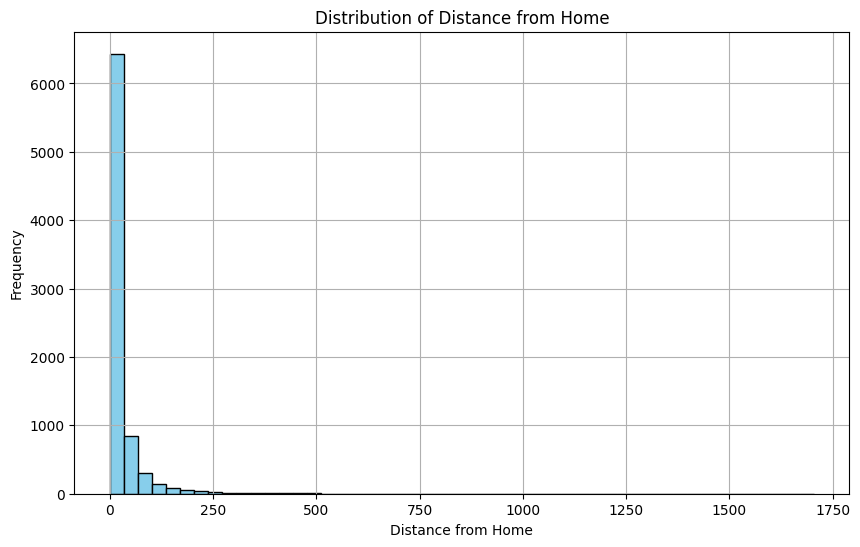

In [161]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(sample_df['distance_from_home'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [162]:
print(max(sample_df['distance_from_home']))
print(min(sample_df['distance_from_home']))
print(sample_df['distance_from_home'].mean())
print(sample_df['distance_from_home'].median())
print(sample_df['distance_from_home'].std())

1705.1429973625036
0.0578684622418679
27.2266057503474
9.87561370949252
61.443675364951766


In [163]:
sample_df['distance_from_home'].value_counts()

,count
distance_from_home,
23.581071,1
1.784500,1
7.324432,1
29.051688,1
5.744617,1
...,...
4.811484,1
7.157094,1
87.888555,1


In [164]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600]
labels = ['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000-1100', '1100-1200', '1200-1300', '1300-1400', '1400-1500', '1500-1600']

In [165]:
sample_df['distance_from_home_group'] = pd.cut(sample_df['distance_from_home'], bins=bins, labels=labels)
distance_count = sample_df['distance_from_home_group'].value_counts()

In [166]:
print(distance_count)

distance_from_home_group
0-100        7565
100-200       287
200-300        90
300-400        24
400-500        15
500-600         7
600-700         5
900-1000        2
800-900         1
1000-1100       1
1200-1300       1
1400-1500       1
700-800         0
1100-1200       0
1300-1400       0
1500-1600       0
Name: count, dtype: int64


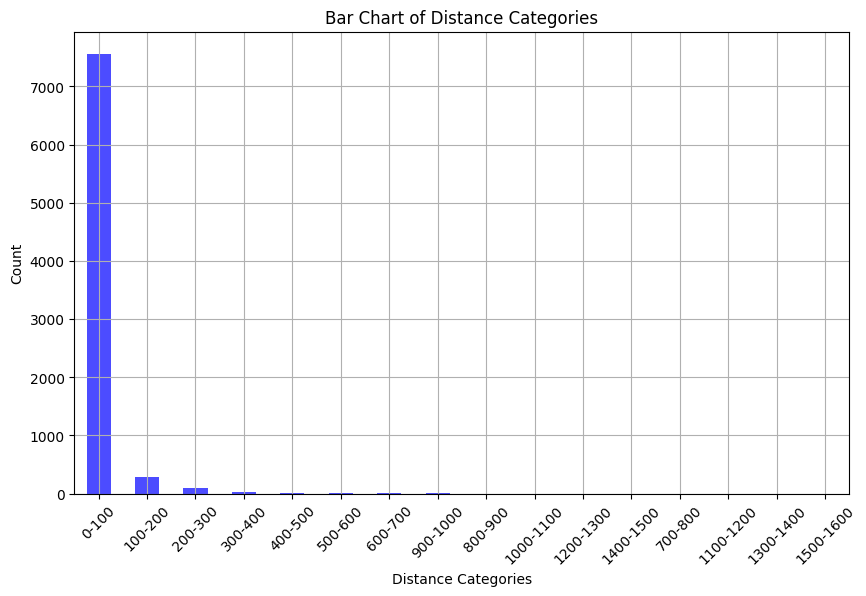

In [167]:
# Plotting the grouped data
plt.figure(figsize=(10, 6))  # Adjust size as needed
distance_count.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Bar Chart of Distance Categories')
plt.xlabel('Distance Categories')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

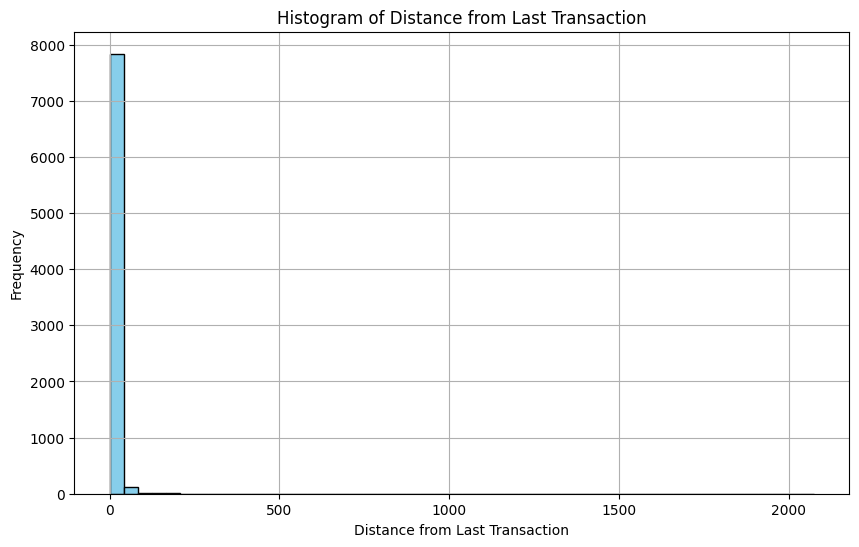

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(sample_df['distance_from_last_transaction'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Distance from Last Transaction')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [169]:
print(max(sample_df['distance_from_last_transaction']))
print(min(sample_df['distance_from_last_transaction']))
print(sample_df['distance_from_last_transaction'].mean())
print(sample_df['distance_from_last_transaction'].median())
print(sample_df['distance_from_last_transaction'].std())

2074.3958483428914
0.000118281615244
5.0484808195680895
0.9662617934083206
29.787138175683364


In [170]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,1700,1800,1900,2000,2100]
labels = ['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000-1100', '1100-1200', '1200-1300', '1300-1400', '1400-1500', '1500-1600', '1600-1700', '1700-1800', '1800-1900','1900-2000', '2000-2100']

In [171]:
sample_df['distance_from_last_transaction_group'] = pd.cut(sample_df['distance_from_last_transaction'], bins=bins, labels=labels)
distance_from_last_count = sample_df['distance_from_last_transaction_group'].value_counts()

In [172]:
print(distance_from_last_count)

distance_from_last_transaction_group
0-100        7959
100-200        30
200-300         7
600-700         1
700-800         1
2000-2100       1
500-600         1
400-500         0
800-900         0
900-1000        0
300-400         0
1100-1200       0
1200-1300       0
1300-1400       0
1400-1500       0
1500-1600       0
1600-1700       0
1700-1800       0
1800-1900       0
1900-2000       0
1000-1100       0
Name: count, dtype: int64


Text(0.5, 0, 'Distance Categories')

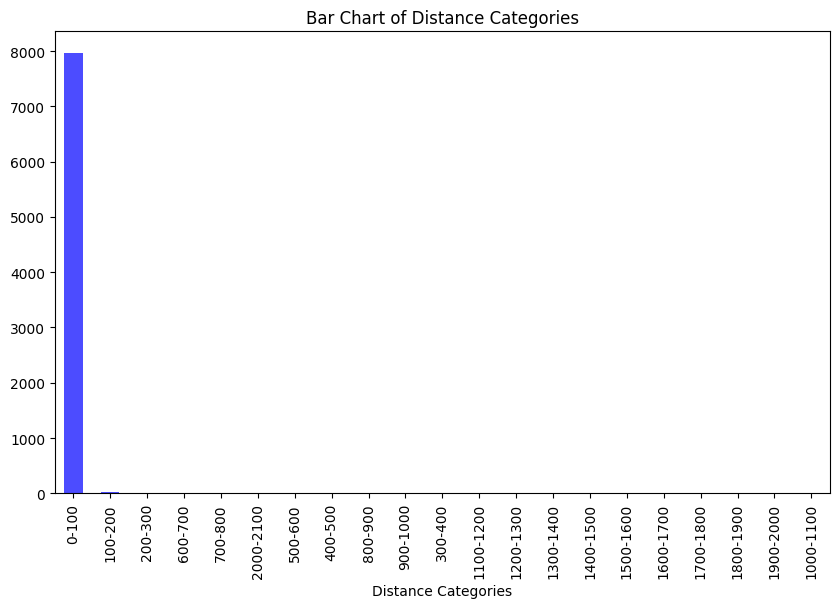

In [173]:
plt.figure(figsize=(10, 6))
distance_from_last_count.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Bar Chart of Distance Categories')
plt.xlabel('Distance Categories')

In [174]:
print(sample_df['ratio_to_median_purchase_price'].mean())
print(sample_df['ratio_to_median_purchase_price'].median())
print(sample_df['ratio_to_median_purchase_price'].std())
print(max(sample_df['ratio_to_median_purchase_price']))
print(min(sample_df['ratio_to_median_purchase_price']))

1.8076179307356102
0.9993758817738301
2.6976659134850896
57.616512686262205
0.0162441511795924


In [175]:
print(sample_df['ratio_to_median_purchase_price'])

467031    0.396650
303715    1.813882
253240    2.652716
963017    0.538939
93063     0.104991
            ...   
72415     0.327672
26660     2.977699
248107    1.586350
194748    1.360744
300209    0.169564
Name: ratio_to_median_purchase_price, Length: 8000, dtype: float64


In [176]:
# Check the data type of the 'bins' variable
print(type(bins))

# Check the data type of the 'ratio_to_median_purchase_price' column
print(sample_df['ratio_to_median_purchase_price'].dtype)

<class 'list'>
float64


In [177]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50', '50-55', '55-60']

In [178]:
sample_df['ratio_to_median_purchase_price'] = pd.to_numeric(sample_df['ratio_to_median_purchase_price'], errors='coerce')

ratio_grouping = sample_df['ratio_to_median_purchase_price_group'] = pd.cut(
    sample_df['ratio_to_median_purchase_price'],
    bins=bins,
    labels=labels,
    right=False
)

Text(0, 0.5, 'Count')

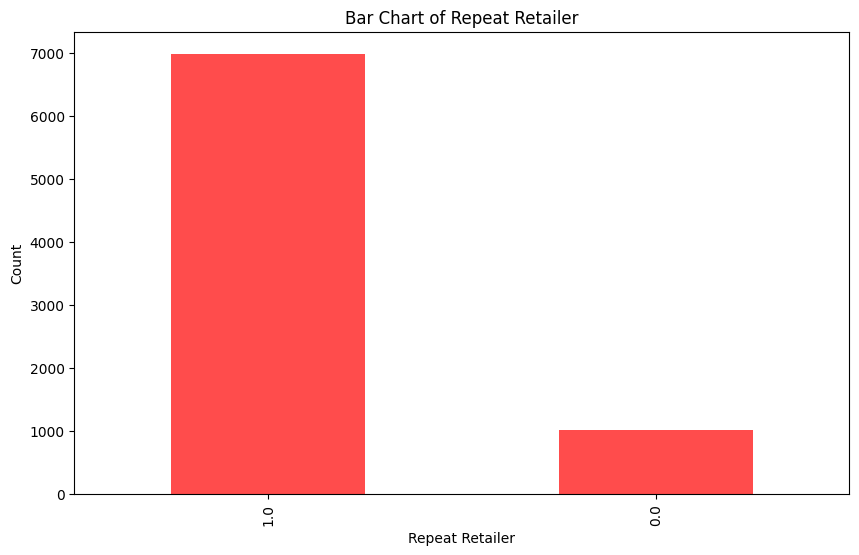

In [179]:
repeat_retailer_count = sample_df['repeat_retailer'].value_counts()
plt.figure(figsize=(10, 6))
repeat_retailer_count.plot(kind='bar', color='red', alpha=0.7)
plt.title('Bar Chart of Repeat Retailer')
plt.xlabel('Repeat Retailer')
plt.ylabel('Count')


Text(0.5, 1.0, 'Bar Chart of Used Chip')

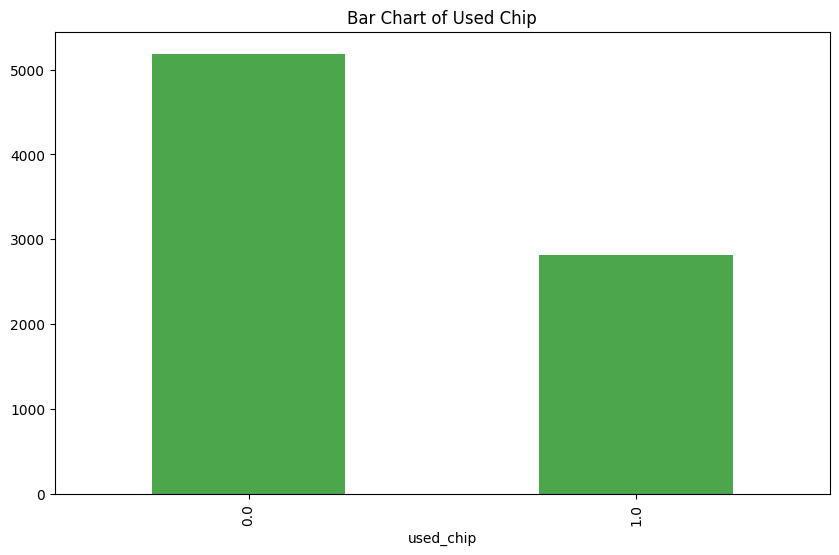

In [180]:
used_chip_count = sample_df['used_chip'].value_counts()
plt.figure(figsize=(10, 6))
used_chip_count.plot(kind='bar', color='green', alpha=0.7)
plt.title('Bar Chart of Used Chip')

Text(0.5, 1.0, 'Bar Chart of Used Pin Number')

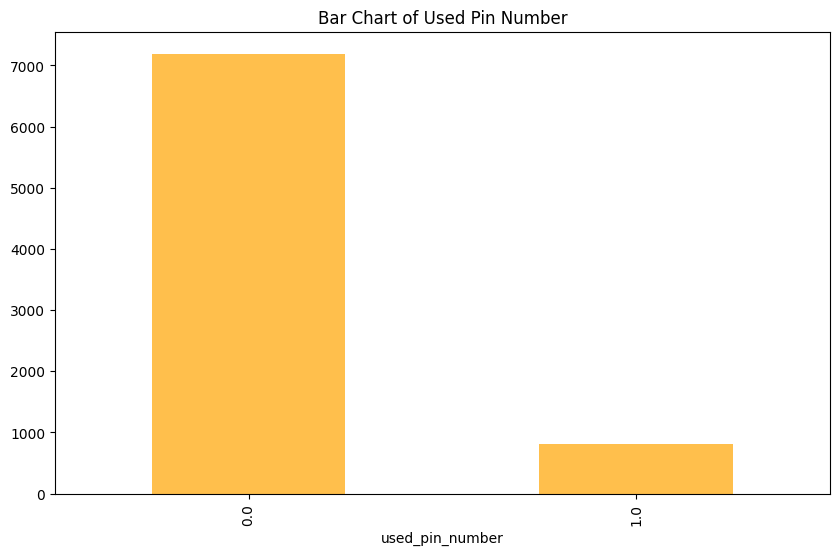

In [181]:
used_pin_count = sample_df['used_pin_number'].value_counts()
plt.figure(figsize=(10, 6))
used_pin_count.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Bar Chart of Used Pin Number')

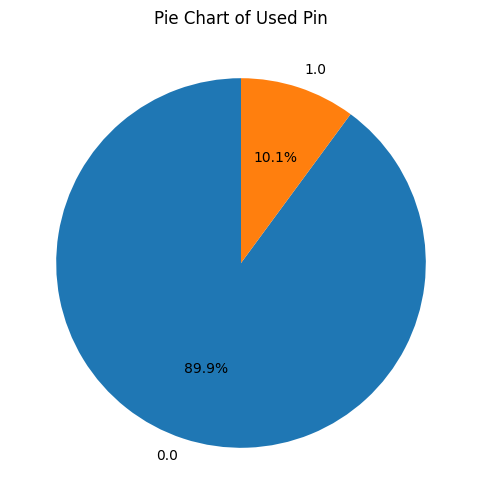

In [182]:
used_pin_count = sample_df['used_pin_number'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(used_pin_count, labels=used_pin_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Used Pin')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Bar Chart of Online Order')

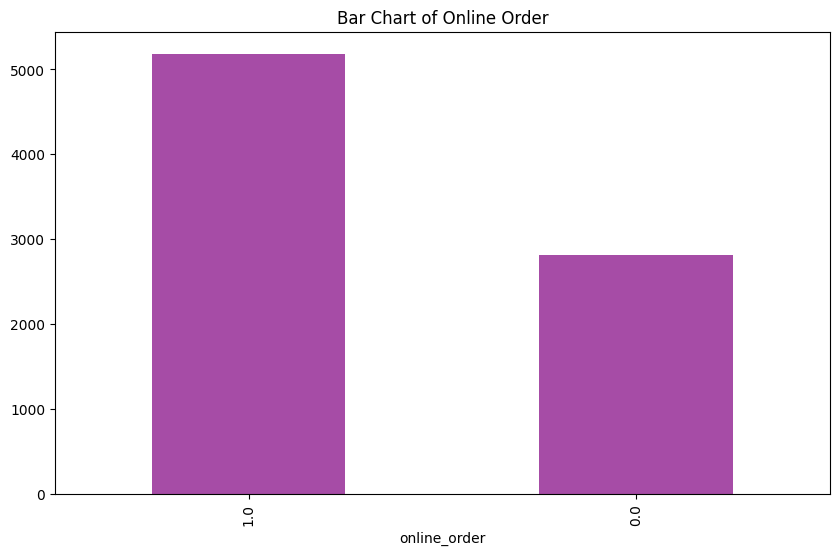

In [183]:
online_order_count = sample_df['online_order'].value_counts()
plt.figure(figsize=(10, 6))
online_order_count.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Bar Chart of Online Order')

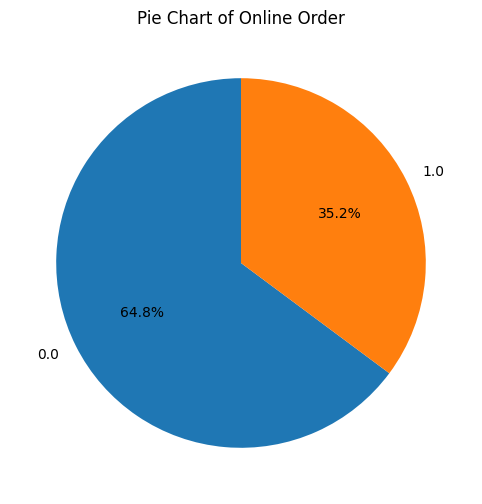

In [184]:
online_order_count = sample_df['online_order'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(online_order_count, labels=used_pin_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Online Order')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Count')

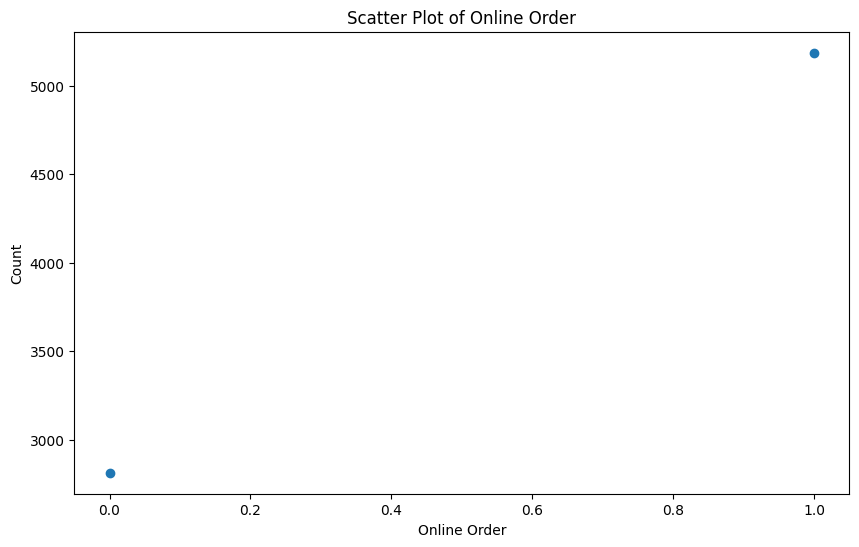

In [185]:
online_order_count = sample_df['online_order'].value_counts()
plt.figure(figsize=(10, 6))
plt.scatter(online_order_count.index, online_order_count.values)
plt.title('Scatter Plot of Online Order')
plt.xlabel('Online Order')
plt.ylabel('Count')

<Figure size 1800x1000 with 0 Axes>

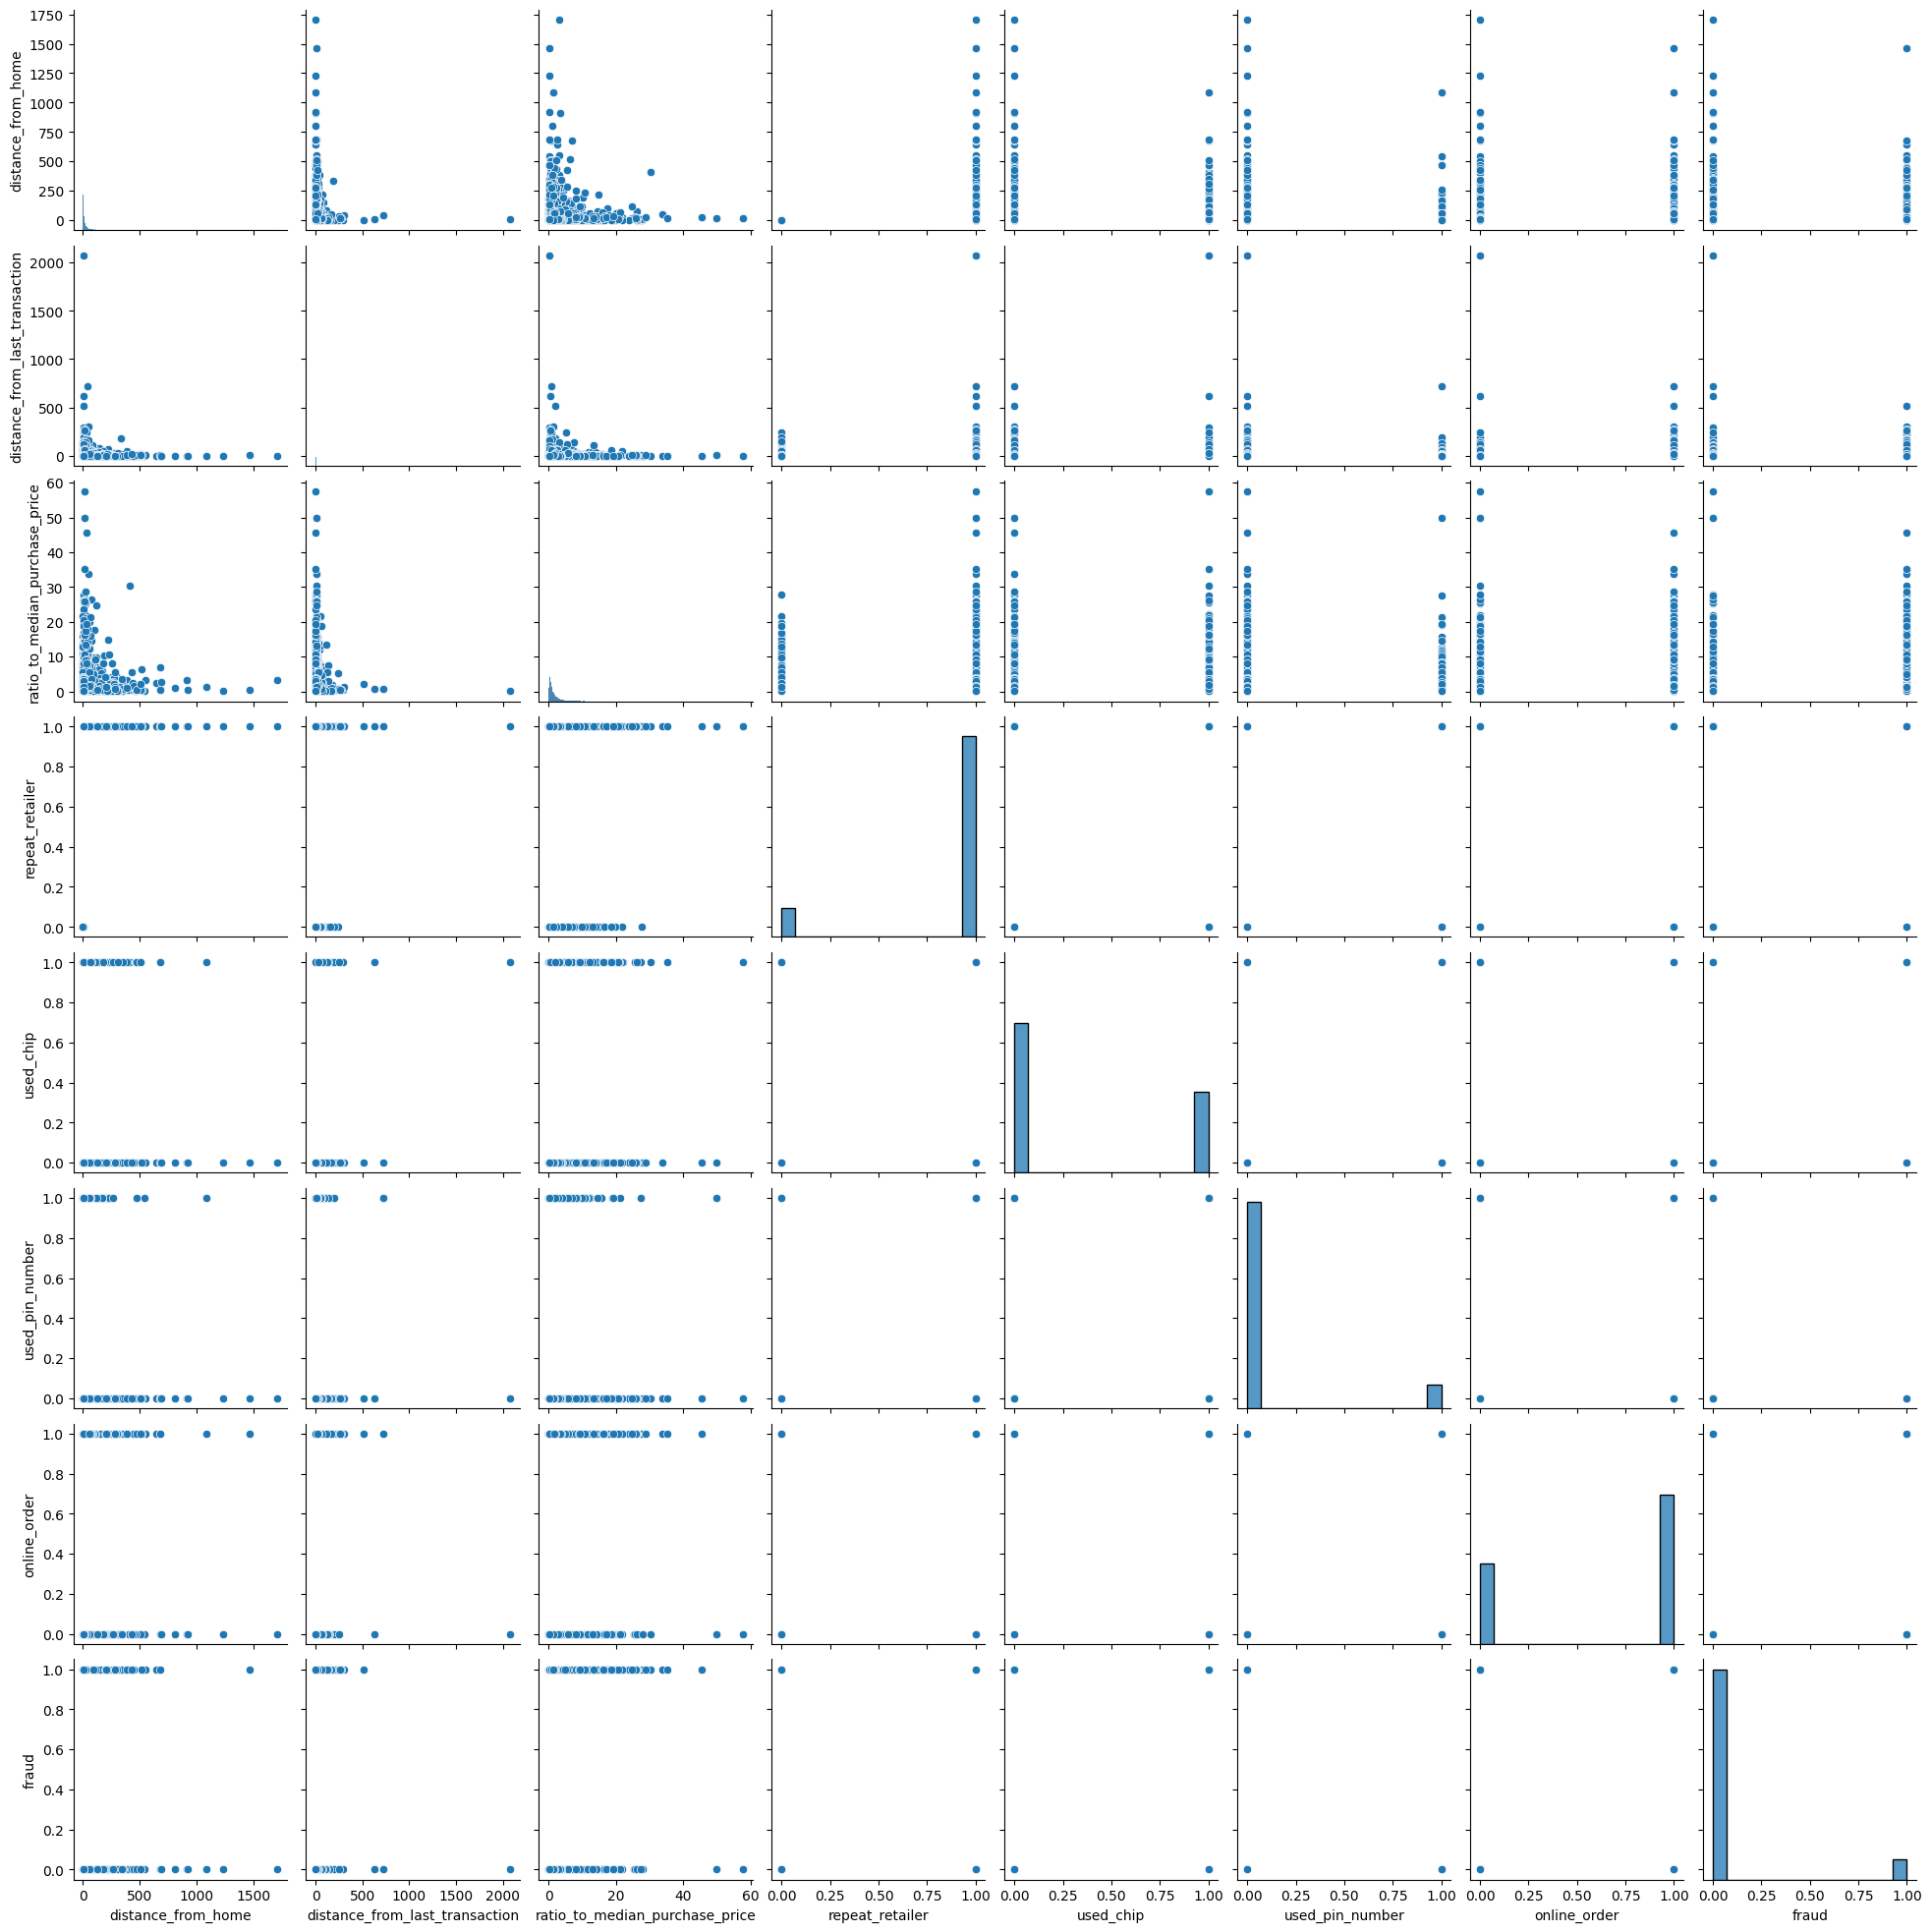

In [186]:

plt.figure(figsize=(18, 10))  # Adjust the size (width, height)
sns.pairplot(sample_df)
#

In [187]:
sample_df_le = sample_df.copy()

In [188]:
label_encoders = {}
for column in sample_df_le.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    sample_df_le[column] = le.fit_transform(sample_df_le[column])
    label_encoders[column] = le

Text(0.5, 1.0, 'Correlation Heatmap')

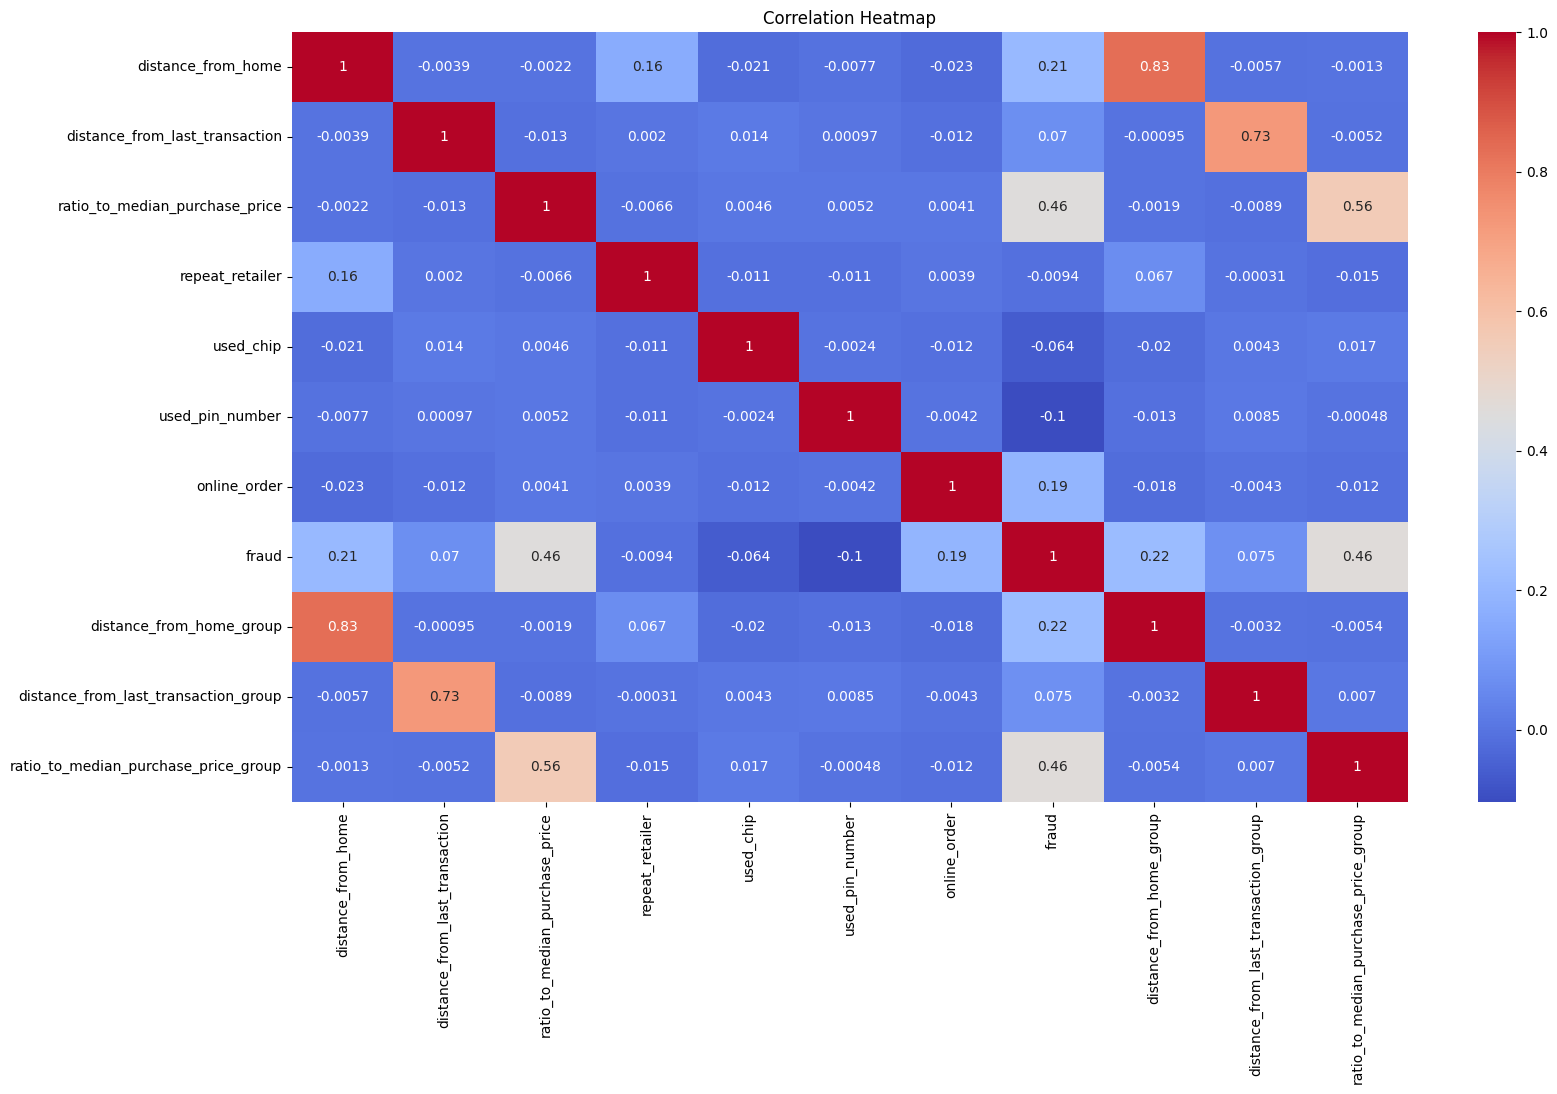

In [189]:
sample_df_corr = sample_df_le.corr()
plt.figure(figsize=(18,10))
sns.heatmap(sample_df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

**Bivariate Analysis**

In [190]:
sample_df['distance_from_home_group'] = pd.cut(sample_df['distance_from_home'], bins=bins, labels=labels)
distance_count = sample_df['distance_from_home_group'].value_counts()
print(distance_count)

distance_from_home_group
0-5      2515
5-10     1516
10-15     899
15-20     578
20-25     418
25-30     290
30-35     248
40-45     184
35-40     178
45-50     135
55-60     105
50-55     103
Name: count, dtype: int64


   distance_from_home_group     fraud
0                       0-5  0.075547
1                      5-10  0.048813
2                     10-15  0.067853
3                     15-20  0.064014
4                     20-25  0.047847
5                     25-30  0.075862
6                     30-35  0.072581
7                     35-40  0.101124
8                     40-45  0.070652
9                     45-50  0.074074
10                    50-55  0.048544
11                    55-60  0.085714


Text(0, 0.5, 'Fraud Rate')

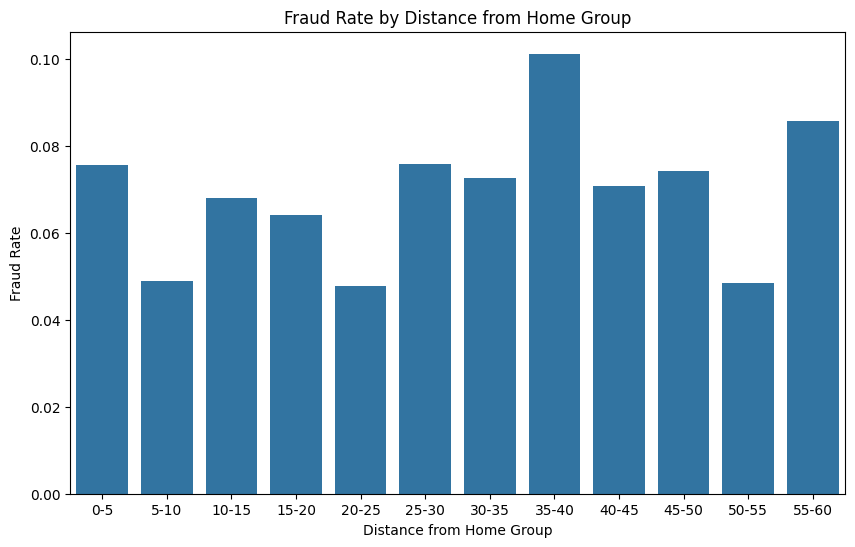

In [191]:
distance_from_home_fraud = sample_df.groupby('distance_from_home_group')['fraud'].mean().reset_index()
print(distance_from_home_fraud)
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_from_home_group', y='fraud', data=distance_from_home_fraud)
plt.title('Fraud Rate by Distance from Home Group')
plt.xlabel('Distance from Home Group')
plt.ylabel('Fraud Rate')

In [192]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,1700,1800,1900,2000,2100]
labels = ['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000-1100', '1100-1200', '1200-1300', '1300-1400', '1400-1500', '1500-1600', '1600-1700', '1700-1800', '1800-1900','1900-2000', '2000-2100']


sample_df['distance_from_last_transaction_group'] = pd.cut(sample_df['distance_from_last_transaction'], bins=bins, labels=labels)
distance_from_last_transaction_count = sample_df['distance_from_last_transaction_group'].value_counts()
print(distance_from_last_transaction_count)

distance_from_last_transaction_group
0-100        7959
100-200        30
200-300         7
600-700         1
700-800         1
2000-2100       1
500-600         1
400-500         0
800-900         0
900-1000        0
300-400         0
1100-1200       0
1200-1300       0
1300-1400       0
1400-1500       0
1500-1600       0
1600-1700       0
1700-1800       0
1800-1900       0
1900-2000       0
1000-1100       0
Name: count, dtype: int64


   distance_from_last_transaction_group     fraud
0                                 0-100  0.085312
1                               100-200  0.466667
2                               200-300  0.714286
3                               300-400       NaN
4                               400-500       NaN
5                               500-600  1.000000
6                               600-700  0.000000
7                               700-800  0.000000
8                               800-900       NaN
9                              900-1000       NaN
10                            1000-1100       NaN
11                            1100-1200       NaN
12                            1200-1300       NaN
13                            1300-1400       NaN
14                            1400-1500       NaN
15                            1500-1600       NaN
16                            1600-1700       NaN
17                            1700-1800       NaN
18                            1800-1900       NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '0-100'),
  Text(1, 0, '100-200'),
  Text(2, 0, '200-300'),
  Text(3, 0, '300-400'),
  Text(4, 0, '400-500'),
  Text(5, 0, '500-600'),
  Text(6, 0, '600-700'),
  Text(7, 0, '700-800'),
  Text(8, 0, '800-900'),
  Text(9, 0, '900-1000'),
  Text(10, 0, '1000-1100'),
  Text(11, 0, '1100-1200'),
  Text(12, 0, '1200-1300'),
  Text(13, 0, '1300-1400'),
  Text(14, 0, '1400-1500'),
  Text(15, 0, '1500-1600'),
  Text(16, 0, '1600-1700'),
  Text(17, 0, '1700-1800'),
  Text(18, 0, '1800-1900'),
  Text(19, 0, '1900-2000'),
  Text(20, 0, '2000-2100')])

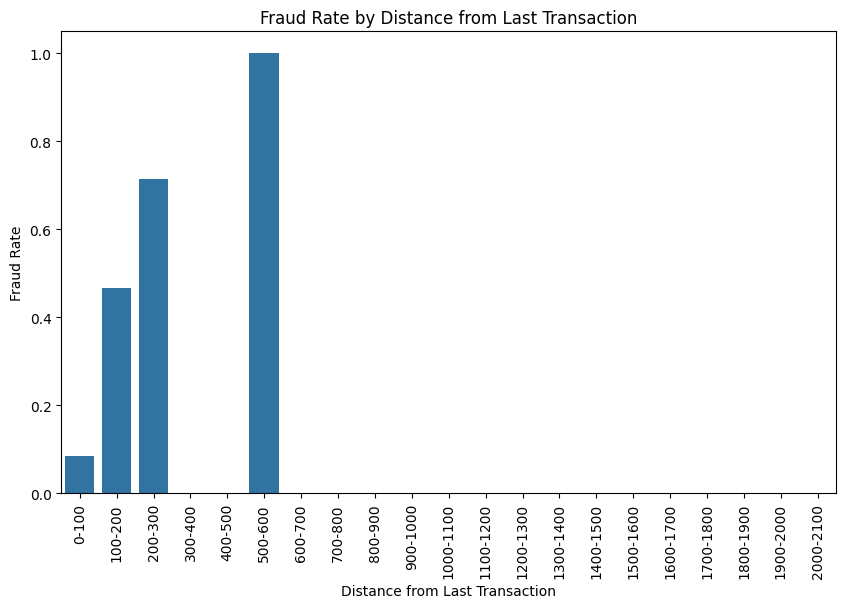

In [193]:
distance_from_last_transaction_fraud = sample_df.groupby('distance_from_last_transaction_group')['fraud'].mean().reset_index() # Changed 'distance_from_last_transaction_count' to 'distance_from_last_transaction_group'
print(distance_from_last_transaction_fraud)
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_from_last_transaction_group', y='fraud', data=distance_from_last_transaction_fraud) # Changed 'distance_from_last_transaction_count' to 'distance_from_last_transaction_group'
plt.title('Fraud Rate by Distance from Last Transaction')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=90)

   repeat_retailer     fraud
0              0.0  0.094303
1              1.0  0.086365


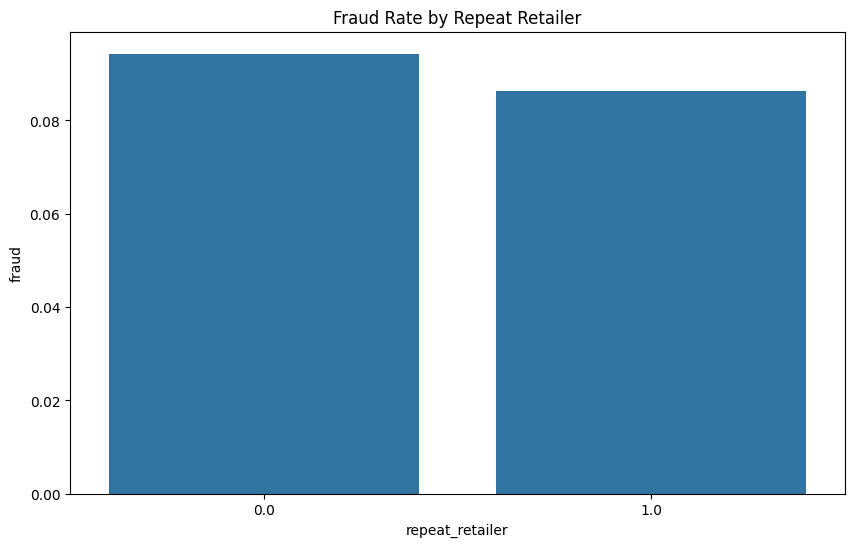

In [194]:
retailer_chip_fraud = sample_df.groupby('repeat_retailer')['fraud'].mean().reset_index()
print(retailer_chip_fraud)
plt.figure(figsize=(10, 6))
sns.barplot(x='repeat_retailer', y='fraud', data=retailer_chip_fraud)
plt.title('Fraud Rate by Repeat Retailer')
plt.show()

   used_chip     fraud
0        0.0  0.100578
1        1.0  0.062989


Text(0.5, 1.0, 'Fraud Rate by Used Chip')

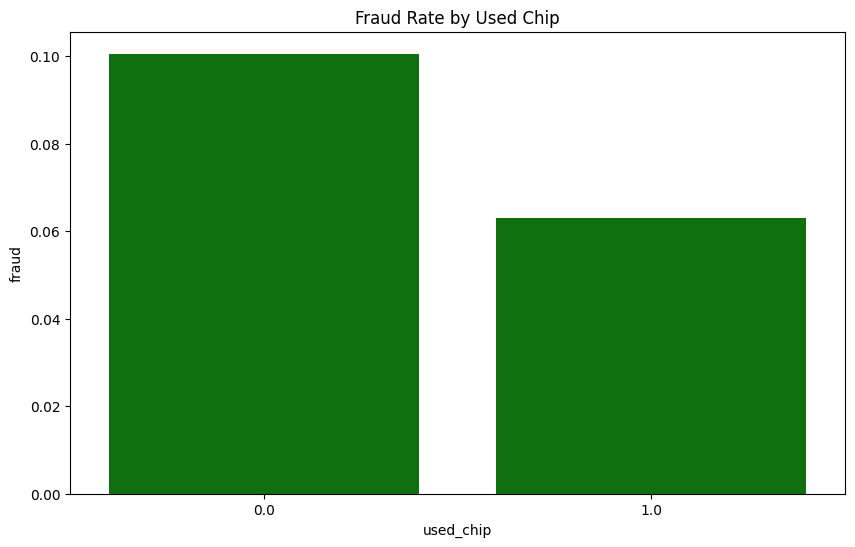

In [195]:
used_chip_fraud = sample_df.groupby('used_chip')['fraud'].mean().reset_index()
print(used_chip_fraud)
plt.figure(figsize=(10, 6))
sns.barplot(x='used_chip', y='fraud', color='green', data=used_chip_fraud)
plt.title('Fraud Rate by Used Chip')

   used_pin_number     fraud
0              0.0  0.097191
1              1.0  0.000000


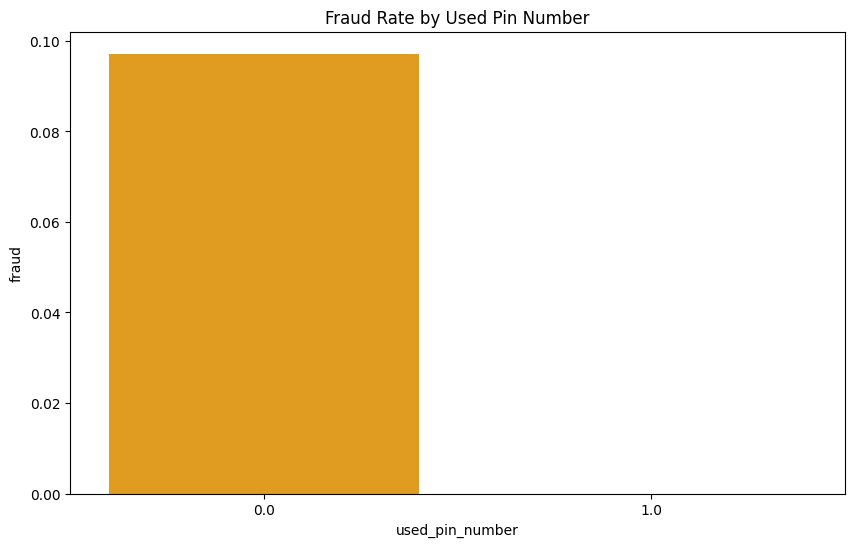

In [196]:
used_pin_number_fraud = sample_df.groupby('used_pin_number')['fraud'].mean().reset_index()
print(used_pin_number_fraud)
plt.figure(figsize=(10, 6))
sns.barplot(x='used_pin_number', y='fraud', color='orange', data=used_pin_number_fraud)
plt.title('Fraud Rate by Used Pin Number')
plt.show()

   online_order     fraud
0           0.0  0.013504
1           1.0  0.127459


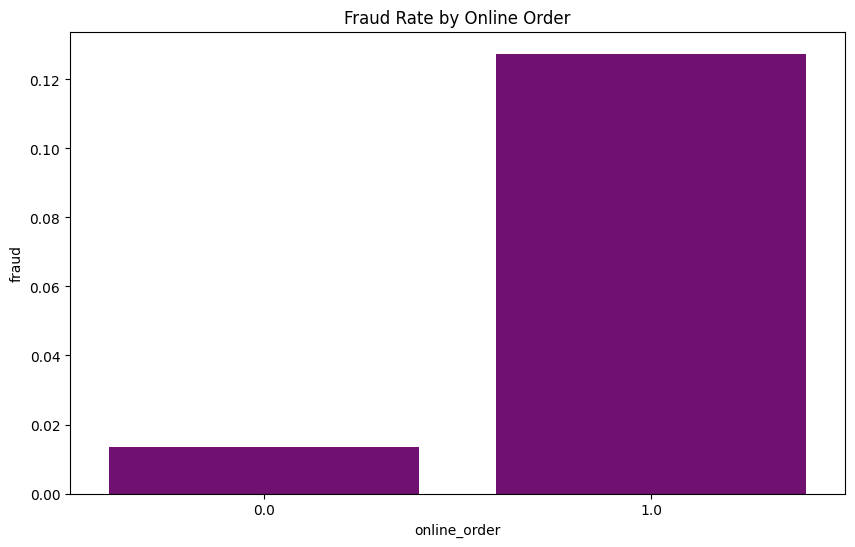

In [197]:
online_order_fraud = sample_df.groupby('online_order')['fraud'].mean().reset_index()
print(online_order_fraud)
plt.figure(figsize=(10, 6))
sns.barplot(x='online_order', y='fraud', color='purple', data=online_order_fraud)
plt.title('Fraud Rate by Online Order')
plt.show()

In [198]:
sample_df.head(20)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,distance_from_home_group,distance_from_last_transaction_group,ratio_to_median_purchase_price_group
467031,23.581071,4.385017,0.396650,1.0,0.0,0.0,0.0,0.0,20-25,0-100,0-5
303715,79.906604,0.593086,1.813882,1.0,0.0,0.0,1.0,0.0,NaN,0-100,0-5
253240,116.294785,7.667570,2.652716,1.0,1.0,0.0,0.0,0.0,NaN,0-100,0-5
963017,411.905878,2.747032,0.538939,1.0,0.0,0.0,0.0,0.0,NaN,0-100,0-5
93063,2.919675,172.604149,0.104991,1.0,1.0,0.0,1.0,0.0,0-5,100-200,0-5
173747,8.703234,1.473756,0.290746,1.0,0.0,0.0,1.0,0.0,5-10,0-100,0-5
817766,52.613600,4.423618,0.767594,1.0,0.0,0.0,1.0,0.0,50-55,0-100,0-5
222459,27.903976,0.836069,10.348355,1.0,1.0,1.0,1.0,0.0,25-30,0-100,10-15
584854,2.719214,0.052814,1.637753,1.0,1.0,0.0,1.0,0.0,0-5,0-100,0-5
803321,0.789131,3.543191,1.540611,0.0,1.0,0.0,0.0,0.0,0-5,0-100,0-5


In [199]:
le = LabelEncoder()

# Apply label encoding to each column
sample_df['distance_from_home_group_encoded'] = le.fit_transform(sample_df['distance_from_home_group'])
sample_df['distance_from_last_transaction_group_encoded'] = le.fit_transform(sample_df['distance_from_last_transaction_group'])
sample_df['ratio_to_median_purchase_price_group_encoded'] = le.fit_transform(sample_df['ratio_to_median_purchase_price_group'])

In [200]:
print(sample_df['distance_from_home_group_encoded'])

467031     3
303715    12
253240    12
963017    12
93063      0
          ..
72415     12
26660      9
248107    11
194748     0
300209     9
Name: distance_from_home_group_encoded, Length: 8000, dtype: int64


In [201]:
X=sample_df.drop('fraud', axis=1)
y=sample_df['fraud']

In [202]:

le = LabelEncoder()


sample_df['distance_from_group_encoded'] = le.fit_transform(sample_df['distance_from_home_group'])
sample_df['distance_from_last_transaction_group_encoded'] = le.fit_transform(sample_df['distance_from_last_transaction_group'])
sample_df['ratio_to_median_purchase_price_group_encoded'] = le.fit_transform(sample_df['ratio_to_median_purchase_price_group'])

X = sample_df.drop(['fraud', 'distance_from_home_group', 'distance_from_last_transaction_group', 'ratio_to_median_purchase_price_group'], axis=1)

X['distance_from_group_encoded'] = sample_df['distance_from_group_encoded']
X['distance_from_last_transaction_group_encoded'] = sample_df['distance_from_last_transaction_group_encoded']
X['ratio_to_median_purchase_price_group_encoded'] = sample_df['ratio_to_median_purchase_price_group_encoded']


y = sample_df['fraud']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [205]:
y_pred_knn = knn.predict(X_test)

In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


results_knn = {
"k-NN: Accuracy": accuracy_score(y_test, y_pred_knn),
"k-NN: Precision": precision_score(y_test, y_pred_knn),
"k-NN: Recall": recall_score(y_test, y_pred_knn),
"k-NN: F1 Score": f1_score(y_test, y_pred_knn),
"k-NN: ROC AUC Score": roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
}

print("k-NN Results:")
for metric, value in results_knn.items(): # Iterate over key-value pairs in the dictionary
    print(f"  {metric}: {value:.2f}")

k-NN Results:
  k-NN: Accuracy: 0.99
  k-NN: Precision: 0.98
  k-NN: Recall: 0.90
  k-NN: F1 Score: 0.94
  k-NN: ROC AUC Score: 0.99


In [207]:
print("k-NN Results:")
for metric, value in results_knn.items():
    print(f"  {metric}: {(value *100):.2f}%")

k-NN Results:
  k-NN: Accuracy: 98.94%
  k-NN: Precision: 97.71%
  k-NN: Recall: 90.14%
  k-NN: F1 Score: 93.77%
  k-NN: ROC AUC Score: 98.85%


In [208]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [209]:
results = grid_knn.cv_results_
print("All results:")
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Score: {mean_score:.3f} for params: {params}")

All results:
Score: 0.990 for params: {'n_neighbors': 3}
Score: 0.988 for params: {'n_neighbors': 5}
Score: 0.986 for params: {'n_neighbors': 7}
Score: 0.984 for params: {'n_neighbors': 9}


In [210]:
best_params = grid_knn.best_params_
print("Best parameters found:", best_params)
best_score = grid_knn.best_score_
print("Best cross-validation score:", best_score)
best_estimator = grid_knn.best_estimator_
print("Best estimator:", best_estimator)

Best parameters found: {'n_neighbors': 3}
Best cross-validation score: 0.9901562499999998
Best estimator: KNeighborsClassifier(n_neighbors=3)


In [211]:
#Running model with n_neighbors=3 as identified by GridSearchCV
knn = KNeighborsClassifier(n_neighbors=3)
start_train_time = time.time()
knn.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred_knn = knn.predict(X_test)
end_test_time = time.time()

knn_train_time = end_train_time - start_train_time
knn_test_time = end_test_time - start_test_time

In [212]:
results_knn_GridSearchCV = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1 Score': f1_score(y_test, y_pred_knn),
    'ROC AUC': roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]),
    'Train Time': knn_train_time,
    'Test Time': knn_test_time
}
print("K-Nearest Neighbours GridSearch CV Results:")
for metric, value in results_knn_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

K-Nearest Neighbours GridSearch CV Results:
  Accuracy: 0.99
  Precision: 0.96
  Recall: 0.92
  F1 Score: 0.94
  ROC AUC: 0.98
  Train Time: 0.01
  Test Time: 0.14


In [213]:
print("K-Nearest Neighbours GridSearch CV Results:")
for metric, value in results_knn_GridSearchCV.items():
    print(f"  {metric}: {(value * 100):.2f}%")

K-Nearest Neighbours GridSearch CV Results:
  Accuracy: 98.88%
  Precision: 95.59%
  Recall: 91.55%
  F1 Score: 93.53%
  ROC AUC: 98.12%
  Train Time: 1.15%
  Test Time: 13.94%


In [214]:
y_pred_knn = grid_knn.predict(X_test)

In [215]:
from sklearn.model_selection import cross_val_score

print("k-NN Cross-Validation Scores:", cross_val_score(KNeighborsClassifier(n_neighbors=9), X, y, cv=5))

k-NN Cross-Validation Scores: [0.98    0.99    0.98625 0.9875  0.98875]


In [216]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [217]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

Confusion Matrix:
[[1452    6]
 [  12  130]]


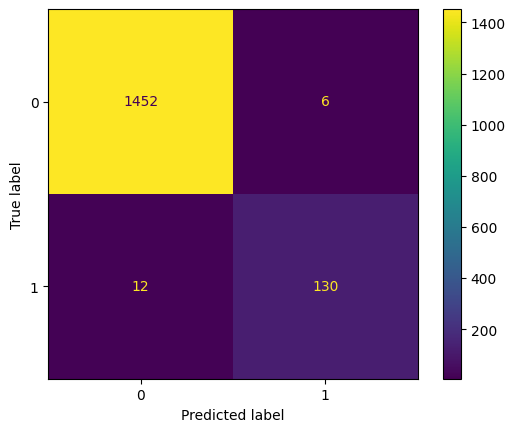

In [218]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(cm_knn)
disp.plot()

**Logistic Regression**

In [219]:
X=sample_df.drop('fraud', axis=1)
y=sample_df['fraud']

In [220]:
le = LabelEncoder()


sample_df['distance_from_group_encoded'] = le.fit_transform(sample_df['distance_from_home_group'])
sample_df['distance_from_last_transaction_group_encoded'] = le.fit_transform(sample_df['distance_from_last_transaction_group'])
sample_df['ratio_to_median_purchase_price_group_encoded'] = le.fit_transform(sample_df['ratio_to_median_purchase_price_group'])

X = sample_df.drop(['fraud', 'distance_from_home_group', 'distance_from_last_transaction_group', 'ratio_to_median_purchase_price_group'], axis=1)

X['distance_from_group_encoded'] = sample_df['distance_from_group_encoded']
X['distance_from_last_transaction_group_encoded'] = sample_df['distance_from_last_transaction_group_encoded']
X['ratio_to_median_purchase_price_group_encoded'] = sample_df['ratio_to_median_purchase_price_group_encoded']


y = sample_df['fraud']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [223]:
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba

In [224]:
results_log_reg = {
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'Precision': precision_score(y_test, y_pred_logreg),
    'Recall': recall_score(y_test, y_pred_logreg),
    'F1 Score': f1_score(y_test, y_pred_logreg),
    'ROC AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

}

print("Logistic Regression Results:")
for metric, value in results_log_reg.items():
    print(f"  {metric}: {value:.4f}")

Logistic Regression Results:
  Accuracy: 0.9606
  Precision: 0.8624
  Recall: 0.6620
  F1 Score: 0.7490
  ROC AUC: 0.9863


In [225]:
print("Logistic Regression Results(%):")
for metric, value in results_log_reg.items():
    print(f"  {metric}: {(value*100):.2f}%")

Logistic Regression Results(%):
  Accuracy: 96.06%
  Precision: 86.24%
  Recall: 66.20%
  F1 Score: 74.90%
  ROC AUC: 98.63%


In [226]:
from sklearn.model_selection import GridSearchCV
param_grid_logreg = {'C': [0.1, 1, 10, 50]}
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5)

grid_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 50]})

In [227]:
results = grid_logreg.cv_results_
print("All results:")
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Score: {mean_score:.3f} for params: {params}")

All results:
Score: 0.958 for params: {'C': 0.1}
Score: 0.963 for params: {'C': 1}
Score: 0.964 for params: {'C': 10}
Score: 0.964 for params: {'C': 50}


In [228]:
best_params = grid_logreg.best_params_
print("Best parameters found:", best_params)
best_score = grid_logreg.best_score_
print("Best cross-validation score:", best_score)
best_estimator = grid_logreg.best_estimator_
print("Best estimator:", best_estimator)

Best parameters found: {'C': 50}
Best cross-validation score: 0.9640625
Best estimator: LogisticRegression(C=50)


In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
logreg = LogisticRegression(C=50, max_iter=1000, random_state=42)

In [231]:
start_logreg_train_time = time.time()
logreg.fit(X_train, y_train)
stop_logreg_train_time = time.time()

In [232]:
start_logreg_test_time = time.time()
y_pred_logreg_GridSearchCV = logreg.predict(X_test)
stop_logreg_test_time = time.time()
y_proba_logreg_GridSearchCV = logreg.predict_proba

In [233]:
results_logreg_GridSearchCV  = {
  '  Accuracy': accuracy_score(y_test, y_pred_logreg_GridSearchCV),
  '  Precision': precision_score(y_test, y_pred_logreg_GridSearchCV),
  '  Recall': recall_score(y_test, y_pred_logreg_GridSearchCV),
  '  F1 Score': f1_score(y_test, y_pred_logreg_GridSearchCV),
  '  ROC AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]),
  '  Train Time': stop_logreg_train_time - start_logreg_train_time,
  '  Test Time': stop_logreg_test_time - start_logreg_test_time
}

In [234]:
print("Logistic Regression Results:")
for metric, value in results_logreg_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

Logistic Regression Results:
    Accuracy: 0.96
    Precision: 0.86
    Recall: 0.67
    F1 Score: 0.75
    ROC AUC: 0.99
    Train Time: 0.03
    Test Time: 0.00


In [235]:

print("Logistic Regression Results:")
for metric, value in results_logreg_GridSearchCV.items():
    print(f"  {metric}: {(value *100):.2f}%")

Logistic Regression Results:
    Accuracy: 96.12%
    Precision: 86.36%
    Recall: 66.90%
    F1 Score: 75.40%
    ROC AUC: 98.72%
    Train Time: 3.08%
    Test Time: 0.11%


In [236]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.959375 0.97     0.958125 0.9575   0.963125]


Confusion Matrix:
[[1443   15]
 [  47   95]]


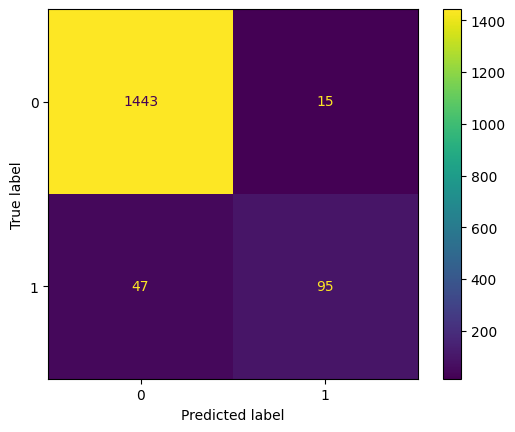

In [237]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_logreg = confusion_matrix(y_test, y_pred_logreg_GridSearchCV)
print("Confusion Matrix:")
print(cm_logreg)
disp = ConfusionMatrixDisplay(cm_logreg)
disp.plot()

**Support Vector Machine (SVM)**

In [238]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [239]:
X=sample_df.drop('fraud', axis=1)
y=sample_df['fraud']

In [240]:
le = LabelEncoder()


sample_df['distance_from_group_encoded'] = le.fit_transform(sample_df['distance_from_home_group'])
sample_df['distance_from_last_transaction_group_encoded'] = le.fit_transform(sample_df['distance_from_last_transaction_group'])
sample_df['ratio_to_median_purchase_price_group_encoded'] = le.fit_transform(sample_df['ratio_to_median_purchase_price_group'])

X = sample_df.drop(['fraud', 'distance_from_home_group', 'distance_from_last_transaction_group', 'ratio_to_median_purchase_price_group'], axis=1)

X['distance_from_group_encoded'] = sample_df['distance_from_group_encoded']
X['distance_from_last_transaction_group_encoded'] = sample_df['distance_from_last_transaction_group_encoded']
X['ratio_to_median_purchase_price_group_encoded'] = sample_df['ratio_to_median_purchase_price_group_encoded']


y = sample_df['fraud']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [242]:
svm = SVC(probability=True)  # Enable probability estimates for ROC AUC
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

In [243]:
results_svm = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1 Score': f1_score(y_test, y_pred_svm),
    'ROC AUC': roc_auc_score(y_test, y_proba_svm)
}

print("SVM Results:")
for metric, value in results_svm.items():
    print(f"  {metric}: {value:.2f}")


SVM Results:
  Accuracy: 0.97
  Precision: 0.96
  Recall: 0.75
  F1 Score: 0.84
  ROC AUC: 1.00


In [244]:
print("SVM Results:")
for metric, value in results_svm.items():
    print(f"  {metric}: {(value *100):.2f}%")

SVM Results:
  Accuracy: 97.50%
  Precision: 95.68%
  Recall: 74.52%
  F1 Score: 83.78%
  ROC AUC: 99.75%


In [245]:
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

In [246]:
grid_search_SVM = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

In [247]:
grid_search_SVM.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [248]:
y_pred_svm_GridSearchCV = svm.predict(X_test)
y_proba_svm_GridSearchCV = svm.predict_proba

In [249]:
results_svm_GridSearchCV  = {
  '  Accuracy': accuracy_score(y_test, y_pred_svm_GridSearchCV),
  '  Precision': precision_score(y_test, y_pred_svm_GridSearchCV),
  '  Recall': recall_score(y_test, y_pred_svm_GridSearchCV),
  '  F1 Score': f1_score(y_test, y_pred_svm_GridSearchCV),
  '  ROC AUC': roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])
}

In [250]:
print("SVM Results:")
for metric, value in results_svm_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

SVM Results:
    Accuracy: 0.97
    Precision: 0.96
    Recall: 0.75
    F1 Score: 0.84
    ROC AUC: 1.00


In [251]:
print("SVM Results:")
for metric, value in results_svm_GridSearchCV.items():
    print(f"  {metric}: {(value *100):.2f}%")

SVM Results:
    Accuracy: 97.50%
    Precision: 95.68%
    Recall: 74.52%
    F1 Score: 83.78%
    ROC AUC: 99.75%


In [252]:
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5)

In [253]:
best_params = grid_search_SVM.best_params_
print("Best parameters found:", best_params)
best_score = grid_search_SVM.best_score_
print("Best cross-validation score:", best_score)
best_estimator = grid_search_SVM.best_estimator_
print("Best estimator:", best_estimator)

Best parameters found: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.9914285714285714
Best estimator: SVC(C=10, gamma=0.1, probability=True)


In [254]:
param_grid = {
    'C': [10],  # Regularization parameter
    'gamma': [0.01],  # Kernel coefficient
    'kernel': [ 'rbf']  # Kernel type
}

In [255]:
grid_search_SVM = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

In [256]:
start_gs_train_time = time.time()
grid_search_SVM.fit(X_train, y_train)
end_gs_train_time = time.time()

In [257]:
start_gs_test_time = time.time()
y_pred_svm_GridSearchCV = svm.predict(X_test)
end_gs_test_time = time.time()
y_proba_svm_GridSearchCV = svm.predict_proba

In [258]:
results_svm_GridSearchCV  = {
  '  Accuracy': accuracy_score(y_test, y_pred_svm_GridSearchCV),
  '  Precision': precision_score(y_test, y_pred_svm_GridSearchCV),
  '  Recall': recall_score(y_test, y_pred_svm_GridSearchCV),
  '  F1 Score': f1_score(y_test, y_pred_svm_GridSearchCV),
  '  ROC AUC': roc_auc_score(y_test, svm.predict_proba(X_test)[:,1]),
  '  Train Time': end_gs_train_time - start_gs_train_time,
  '  Test Time': end_gs_test_time - start_gs_test_time
}

In [259]:
print("SVM Results:")
for metric, value in results_svm_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

SVM Results:
    Accuracy: 0.97
    Precision: 0.96
    Recall: 0.75
    F1 Score: 0.84
    ROC AUC: 1.00
    Train Time: 3.36
    Test Time: 0.06


In [260]:
print("SVM Results:")
for metric, value in results_svm_GridSearchCV.items():
    print(f"  {metric}: {(value *100):.2f}%")

SVM Results:
    Accuracy: 97.50%
    Precision: 95.68%
    Recall: 74.52%
    F1 Score: 83.78%
    ROC AUC: 99.75%
    Train Time: 335.73%
    Test Time: 6.42%


Confusion Matrix:
[[2185    7]
 [  53  155]]


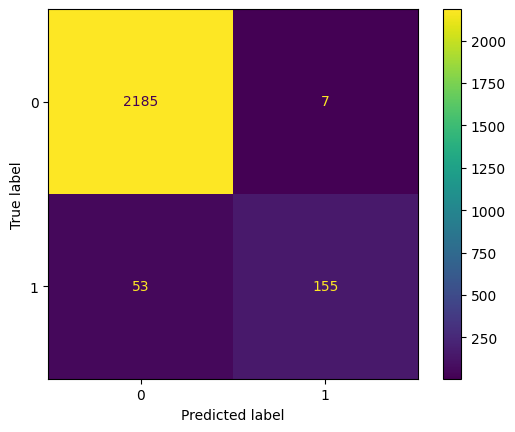

In [261]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_svm = confusion_matrix(y_test, y_pred_svm_GridSearchCV)
print("Confusion Matrix:")
print(cm_svm)
disp = ConfusionMatrixDisplay(cm_svm)
disp.plot()

**Decision Trees**

In [262]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [263]:
X=sample_df.drop('fraud', axis=1)
y=sample_df['fraud']

In [264]:
le = LabelEncoder()


sample_df['distance_from_group_encoded'] = le.fit_transform(sample_df['distance_from_home_group'])
sample_df['distance_from_last_transaction_group_encoded'] = le.fit_transform(sample_df['distance_from_last_transaction_group'])
sample_df['ratio_to_median_purchase_price_group_encoded'] = le.fit_transform(sample_df['ratio_to_median_purchase_price_group'])

X = sample_df.drop(['fraud', 'distance_from_home_group', 'distance_from_last_transaction_group', 'ratio_to_median_purchase_price_group'], axis=1)

X['distance_from_group_encoded'] = sample_df['distance_from_group_encoded']
X['distance_from_last_transaction_group_encoded'] = sample_df['distance_from_last_transaction_group_encoded']
X['ratio_to_median_purchase_price_group_encoded'] = sample_df['ratio_to_median_purchase_price_group_encoded']


y = sample_df['fraud']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [265]:
ds = DecisionTreeClassifier()

In [266]:
ds.fit(X_train, y_train)

DecisionTreeClassifier()

In [267]:
y_pred_ds = ds.predict(X_test)
y_proba_ds = ds.predict_proba

In [268]:
results_ds = {
    'Accuracy': accuracy_score(y_test, y_pred_ds),
    'Precision': precision_score(y_test, y_pred_ds),
    'Recall': recall_score(y_test, y_pred_ds),
    'F1 Score': f1_score(y_test, y_pred_ds),
    'ROC AUC': roc_auc_score(y_test, ds.predict_proba(X_test)[:,1])
}

In [269]:
print("Decision Tree Results:")
for metric, value in results_ds.items(): # Iterate over key-value pairs in the dictionary
    print(f"  {metric}: {value:.2f}")

Decision Tree Results:
  Accuracy: 1.00
  Precision: 0.97
  Recall: 0.98
  F1 Score: 0.98
  ROC AUC: 0.99


In [270]:
print("Decision Tree Results:")
for metric, value in results_ds.items(): # Iterate over key-value pairs in the dictionary
    print(f"  {metric}: {(value*100):.2f}%")

Decision Tree Results:
  Accuracy: 99.58%
  Precision: 97.14%
  Recall: 98.08%
  F1 Score: 97.61%
  ROC AUC: 98.90%


In [271]:
#Running gridsearchcv for optimizing hyperparameters for Decision Tree Results

In [272]:
X=sample_df.drop('fraud', axis=1)
y=sample_df['fraud']

In [273]:
le = LabelEncoder()


sample_df['distance_from_group_encoded'] = le.fit_transform(sample_df['distance_from_home_group'])
sample_df['distance_from_last_transaction_group_encoded'] = le.fit_transform(sample_df['distance_from_last_transaction_group'])
sample_df['ratio_to_median_purchase_price_group_encoded'] = le.fit_transform(sample_df['ratio_to_median_purchase_price_group'])

X = sample_df.drop(['fraud', 'distance_from_home_group', 'distance_from_last_transaction_group', 'ratio_to_median_purchase_price_group'], axis=1)

X['distance_from_group_encoded'] = sample_df['distance_from_group_encoded']
X['distance_from_last_transaction_group_encoded'] = sample_df['distance_from_last_transaction_group_encoded']
X['ratio_to_median_purchase_price_group_encoded'] = sample_df['ratio_to_median_purchase_price_group_encoded']


y = sample_df['fraud']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [274]:
ds = DecisionTreeClassifier()

In [275]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [276]:
grid_search_ds = GridSearchCV(estimator=ds,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # Number of folds in cross-validation
                           verbose=1,
                           n_jobs=-1)

In [277]:
start_ds_train_time = time.time()
grid_search_ds.fit(X_train, y_train)
end_ds_train_time = time.time()

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [278]:
start_ds_test_time = time.time()
y_pred_ds_GridSearchCV = grid_search_ds.predict(X_test)
end_ds_test_time = time.time()
y_proba_ds_GridSearchCV = grid_search_ds.predict_proba

In [279]:
results_ds_GridSearchCV  = {
  '  Accuracy': accuracy_score(y_test, y_pred_ds_GridSearchCV),
  '  Precision': precision_score(y_test, y_pred_ds_GridSearchCV),
  '  Recall': recall_score(y_test, y_pred_ds_GridSearchCV),
  '  F1 Score': f1_score(y_test, y_pred_ds_GridSearchCV),
  '  ROC AUC': roc_auc_score(y_test, y_proba_ds_GridSearchCV(X_test)[:,1]),
  '  Train Time': end_ds_train_time - start_ds_train_time,
  '  Test Time': end_ds_test_time - start_ds_test_time
}

In [280]:
print("Decision Tree Grid Search Results:")
for metric, value in results_ds_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

Decision Tree Grid Search Results:
    Accuracy: 1.00
    Precision: 0.99
    Recall: 1.00
    F1 Score: 0.99
    ROC AUC: 1.00
    Train Time: 2.98
    Test Time: 0.00


In [281]:
print("Decision Tree Grid Search Results:")
for metric, value in results_ds_GridSearchCV.items():
    print(f"  {metric}: {(value*100):.2f}%")

Decision Tree Grid Search Results:
    Accuracy: 99.88%
    Precision: 99.04%
    Recall: 99.52%
    F1 Score: 99.28%
    ROC AUC: 99.71%
    Train Time: 298.04%
    Test Time: 0.11%


In [282]:
best_params = grid_search_ds.best_params_
print("Best parameters found:", best_params)
best_score = grid_search_ds.best_score_
print("Best cross-validation score:", best_score)
best_estimator = grid_search_ds.best_estimator_
print("Best estimator:", best_estimator)

Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9980357142857142
Best estimator: DecisionTreeClassifier(criterion='entropy')


In [283]:
#Running Decsion Tree based on the most optimal values

In [284]:
X=sample_df.drop('fraud', axis=1)
y=sample_df['fraud']

In [285]:
le = LabelEncoder()


sample_df['distance_from_group_encoded'] = le.fit_transform(sample_df['distance_from_home_group'])
sample_df['distance_from_last_transaction_group_encoded'] = le.fit_transform(sample_df['distance_from_last_transaction_group'])
sample_df['ratio_to_median_purchase_price_group_encoded'] = le.fit_transform(sample_df['ratio_to_median_purchase_price_group'])

X = sample_df.drop(['fraud', 'distance_from_home_group', 'distance_from_last_transaction_group', 'ratio_to_median_purchase_price_group'], axis=1)

X['distance_from_group_encoded'] = sample_df['distance_from_group_encoded']
X['distance_from_last_transaction_group_encoded'] = sample_df['distance_from_last_transaction_group_encoded']
X['ratio_to_median_purchase_price_group_encoded'] = sample_df['ratio_to_median_purchase_price_group_encoded']


y = sample_df['fraud']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [286]:
ds = DecisionTreeClassifier()

In [287]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

In [288]:
grid_search_ds = GridSearchCV(estimator=ds,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # Number of folds in cross-validation
                           verbose=1,
                           n_jobs=-1)

In [289]:
start_ds_train_time = time.time()
grid_search_ds.fit(X_train, y_train)
end_ds_train_time = time.time()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [290]:
start_ds_test_time = time.time()
y_pred_ds_GridSearchCV = grid_search_ds.predict(X_test)
end_ds_test_time = time.time()
y_proba_ds_GridSearchCV = grid_search_ds.predict_proba

In [291]:
results_ds_GridSearchCV  = {
  '  Accuracy': accuracy_score(y_test, y_pred_ds_GridSearchCV),
  '  Precision': precision_score(y_test, y_pred_ds_GridSearchCV),
  '  Recall': recall_score(y_test, y_pred_ds_GridSearchCV),
  '  F1 Score': f1_score(y_test, y_pred_ds_GridSearchCV),
  '  ROC AUC': roc_auc_score(y_test, y_proba_ds_GridSearchCV(X_test)[:,1]),
  '  Train Time': end_ds_train_time - start_ds_train_time,
  '  Test Time': end_ds_test_time - start_ds_test_time
}

In [292]:
print("Decision Tree Grid Search Results:")
for metric, value in results_ds_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

Decision Tree Grid Search Results:
    Accuracy: 1.00
    Precision: 0.99
    Recall: 1.00
    F1 Score: 0.99
    ROC AUC: 1.00
    Train Time: 0.06
    Test Time: 0.00


In [293]:
print("Decision Tree Grid Search Results:")
for metric, value in results_ds_GridSearchCV.items():
    print(f"  {metric}: {(value*100):.2f}%")

Decision Tree Grid Search Results:
    Accuracy: 99.88%
    Precision: 99.04%
    Recall: 99.52%
    F1 Score: 99.28%
    ROC AUC: 99.71%
    Train Time: 6.10%
    Test Time: 0.18%


Confusion Matrix:
[[2190    2]
 [   1  207]]


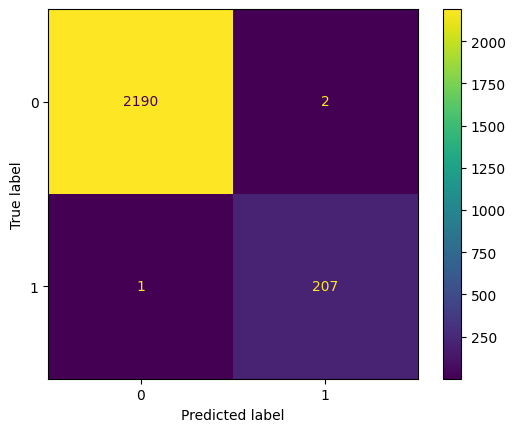

In [294]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_ds = confusion_matrix(y_test, y_pred_ds_GridSearchCV)
print("Confusion Matrix:")
print(cm_ds)
disp = ConfusionMatrixDisplay(cm_ds)
disp.plot()